In [3]:
!pip install numpy matplotlib tensorflow

  Using cached numpy-1.21.2-cp38-cp38-win_amd64.whl (14.0 MB)
  Using cached matplotlib-3.4.3-cp38-cp38-win_amd64.whl (7.1 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached wrapt-1.12.1-py3-none-any.whl
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached protobuf-3.17.3-cp38-cp38-win_amd64.whl (909 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached h5py-3.1.0-cp38-cp38-win_amd64.whl (2.7 MB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached absl_py-0.13.0-py3-none-any.whl (132 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl

## 1.2 Finding the inverse of a parabola

- Illustrates the difference between supervised and DP approaches (differential physics)
- Given $\mathcal P : y \rightarrow y^2$ for $y \in [0,1]$, find the unknown function $f$ s.t. $\mathcal P(f(x)) = x$ for $x \in [0,1]$ 

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### Supervised approach

In [26]:
# X-data
N = 2000
X = np.random.random(N)

# Y-Data
sign = (-np.ones((N,)))**np.random.randint(2, size=N)
Y = np.sqrt(X) * sign

In [42]:
# Neural network
act = tf.keras.layers.ReLU()
nn_sv = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation=act),
    tf.keras.layers.Dense(10, activation=act),
    tf.keras.layers.Dense(1, activation='linear')
])

In [45]:
# Loss function
loss_sv = tf.keras.losses.MeanSquaredError()
optimizer_sv = tf.keras.optimizers.Adam(lr=0.01)
nn_sv.compile(optimizer=optimizer_sv, loss=loss_sv)

In [46]:
# Training
results_sv = nn_sv.fit(X, Y, epochs=20, batch_size=50, verbose=1)

Epoch 1/20
40/40 [==============================] - 0s 1ms/step - loss: 0.5062
Epoch 2/20
40/40 [==============================] - 0s 2ms/step - loss: 0.5053
Epoch 3/20
40/40 [==============================] - 0s 2ms/step - loss: 0.5057
Epoch 4/20
40/40 [==============================] - 0s 2ms/step - loss: 0.5050
Epoch 5/20
40/40 [==============================] - 0s 2ms/step - loss: 0.5050
Epoch 6/20
40/40 [==============================] - 0s 2ms/step - loss: 0.5054
Epoch 7/20
40/40 [==============================] - 0s 1ms/step - loss: 0.5050
Epoch 8/20
40/40 [==============================] - 0s 2ms/step - loss: 0.5054
Epoch 9/20
40/40 [==============================] - 0s 2ms/step - loss: 0.5061
Epoch 10/20
40/40 [==============================] - 0s 1ms/step - loss: 0.5058
Epoch 11/20
40/40 [==============================] - 0s 2ms/step - loss: 0.5041
Epoch 12/20
40/40 [==============================] - 0s 1ms/step - loss: 0.5051
Epoch 13/20
40/40 [==============================

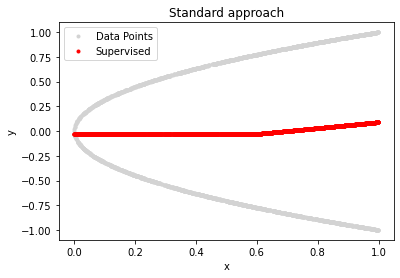

This is obviously wrong!


In [47]:
# Results
plt.plot(X, Y, '.', label='Data Points', color='lightgray')
plt.plot(X, nn_sv.predict(X), '.', label='Supervised', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Standard approach')
plt.legend()
plt.show()
print("This is obviously wrong!")

## 1.3 A differential physics approach

In [22]:
# X-Data
# X = X, we can directly re-use the X from above, nothing has changed
# Y is evaluated on the fly 

# Model
nn_dp = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation=act),
    tf.keras.layers.Dense(10, activation=act),
    tf.keras.layers.Dense(1, activation='linear')
])

In [23]:
# Loss
mse = tf.keras.losses.MeanSquaredError()
def loss_dp(y_true, y_pred):
    return mse(y_true, y_pred**2)

optimizer_dp = tf.keras.optimizers.Adam(lr=0.001)
nn_dp.compile(optimizer=optimizer_dp, loss=loss_dp)

C:\Users\WeberJ\Miniconda3\envs\physics-based-deep-learning\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [24]:
# Training
results_dp = nn_dp.fit(X, X, epochs=5, batch_size=5, verbose=1)

Epoch 1/5
40/40 [==============================] - 1s 2ms/step - loss: 0.2563
Epoch 2/5
40/40 [==============================] - 0s 2ms/step - loss: 0.0533
Epoch 3/5
40/40 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 4/5
40/40 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 5/5
40/40 [==============================] - 0s 2ms/step - loss: 0.0011


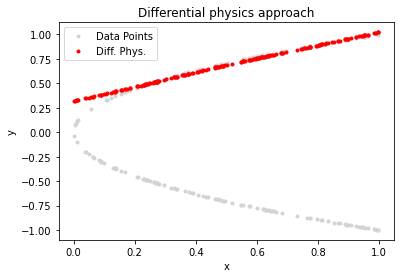

This is obviously wrong!


In [25]:
# Results
plt.plot(X, Y, '.', label='Data Points', color='lightgray')
plt.plot(X, nn_dp.predict(X), '.', label='Diff. Phys.', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Differential physics approach')
plt.legend()
plt.show()
print("This is obviously wrong!")

## Try 2-D Example

- Given $\mathcal P : (y_1, y_2) \rightarrow y_1^2 + y_2^2$ find an inverse function $f$ such that $\mathcal P(f(x)) = x$ for $x \in [0,1]$

In [50]:
# X-data
N = 2000
X = np.random.random((N, 2))

# Y-Data
sign = (-np.ones((N,)))**np.random.randint(2, size=N)
Y = np.sum(np.sqrt(X)) * sign

In [ ]:
# Model
nn_dp_2d = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation=act),
    tf.keras.layers.Dense(10, activation=act),
    tf.keras.layers.Dense(1, activation='linear')
])

In [ ]:
# Loss
mse = tf.keras.losses.MeanSquaredError()
def loss_dp(y_true, y_pred):
    return mse(y_true, np.sum(y_pred**2))

optimizer_dp = tf.keras.optimizers.Adam(lr=0.001)
nn_dp.compile(optimizer=optimizer_dp, loss=loss_dp)

In [ ]:
# Training
results_dp = nn_dp.fit(X, X, epochs=5, batch_size=5, verbose=1)

In [ ]:
# Results
plt.plot(X, Y, '.', label='Data Points', color='lightgray')
plt.plot(X, nn_dp.predict(X), '.', label='Diff. Phys.', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Differential physics approach')
plt.legend()
plt.show()
print("This is obviously wrong!")